In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def generate_trend_drift(
    n_periods: int = 1000,
    drift_point: int = 600,
    slope_pre: float = 0.02,
    slope_post: float = 1.0,
    noise_std: float = 1.0,
    random_seed: int = 42
) -> np.ndarray:
    """
    Generate a time series with a linear trend before `drift_point` and a logarithmic trend after it.
    """
    rng = np.random.default_rng(random_seed)
    t = np.arange(n_periods)
    
    pre = slope_pre * t
    
    post = (
        slope_pre * drift_point
        + slope_post * np.log1p(t - drift_point)
    )
    
    base = np.where(t < drift_point, pre, post)
    noise = rng.normal(0, noise_std, size=n_periods)
    return base + noise


def generate_seasonal_drift(
    n_periods: int = 1000,
    drift_point: int = 600,
    amp_pre: float = 5.0,
    amp_post: float = 15.0,
    period: float = 200.0,
    noise_std: float = 2.0,
    random_seed: int = 24
) -> np.ndarray:
    """
    Generate a seasonal sine wave plus noise with an amplitude drift at `drift_point`.
    """
    rng = np.random.default_rng(random_seed)
    t = np.arange(n_periods)
    amps = np.where(t < drift_point, amp_pre, amp_post)
    seasonal = amps * np.sin(2 * np.pi * t / period)
    noise = rng.normal(0, noise_std, size=n_periods)
    return seasonal + noise


def generate_ar1_drift(
    n_periods: int = 1000,
    drift_point: int = 600,
    phi_pre: float = 0.5,
    phi_post: float = 0.9,
    noise_std: float = 1.0,
    y0: float = 0.0,
    random_seed: int = 7
) -> np.ndarray:
    """
    Generate an AR(1) process with a coefficient drift at `drift_point`.
    """
    rng = np.random.default_rng(random_seed)
    y = np.empty(n_periods)
    y[0] = y0
    for t in range(1, n_periods):
        phi = phi_pre if t < drift_point else phi_post
        eps = rng.normal(0, noise_std)
        y[t] = phi * y[t-1] + eps
    return y

In [30]:
def plot_with_drift(series: np.ndarray, drift_point: int, title: str):
    plt.figure(figsize=(8, 4))
    plt.plot(series, lw=1)
    plt.axvline(drift_point, color='r', linestyle='--', label=f'drift @ t={drift_point}')
    plt.title(title)
    plt.xlabel('Time index')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()

/tmp/ipykernel_62377/3208123581.py:19: RuntimeWarning: divide by zero encountered in log1p
  + slope_post * np.log1p(t - drift_point)
/tmp/ipykernel_62377/3208123581.py:19: RuntimeWarning: invalid value encountered in log1p
  + slope_post * np.log1p(t - drift_point)


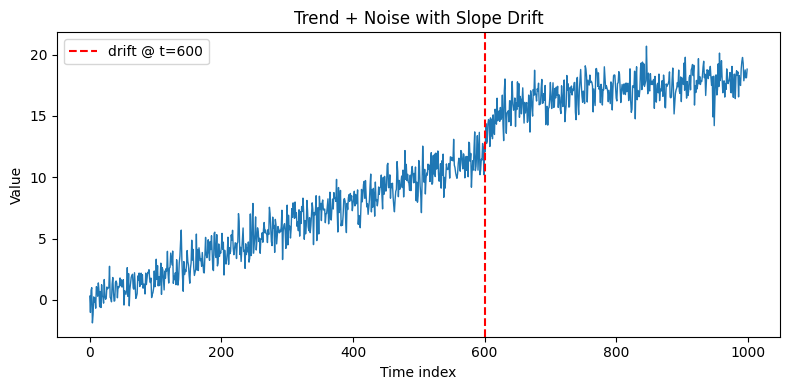

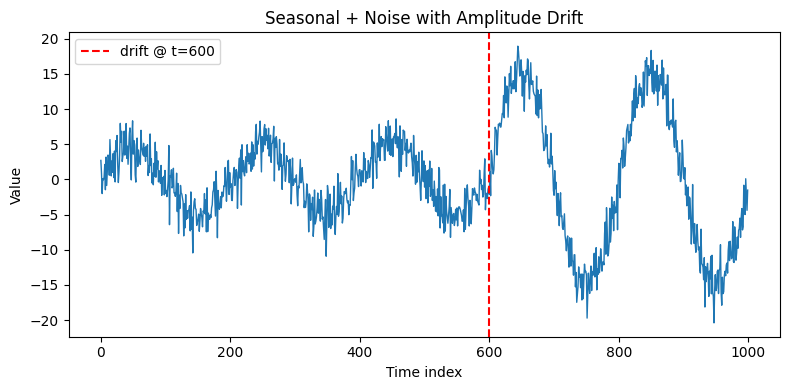

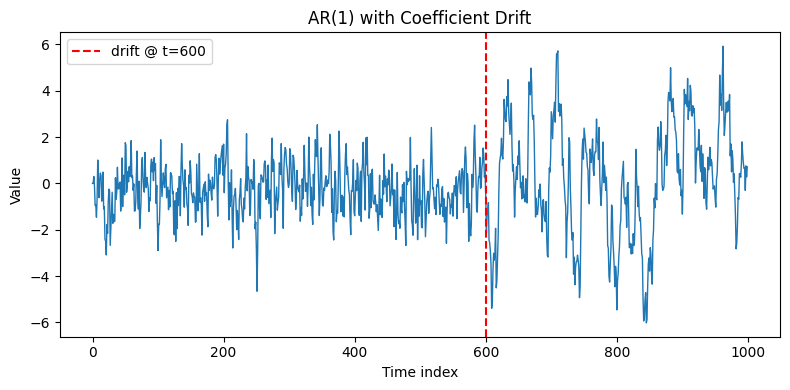

In [32]:
n_periods = 1_000
drift_pt = 600
X_trend = generate_trend_drift(n_periods=n_periods,drift_point=drift_pt)
X_seasonal = generate_seasonal_drift(n_periods=n_periods,drift_point=drift_pt)
X_ar1 = generate_ar1_drift(drift_point=drift_pt)

plot_with_drift(X_trend,    drift_pt, 'Trend + Noise with Slope Drift')
plot_with_drift(X_seasonal, drift_pt, 'Seasonal + Noise with Amplitude Drift')
plot_with_drift(X_ar1,      drift_pt, 'AR(1) with Coefficient Drift')

plt.show()

In [23]:
import pandas as pd
import yfinance as yf
import datetime

In [25]:
end_time = datetime.datetime.now()
end_time_str = end_time.strftime("%Y-%m-%d")
end_time_str

'2025-05-09'

In [26]:
start_time = end_time - datetime.timedelta(days=729)
start_time_str = start_time.strftime("%Y-%m-%d")
start_time_str

'2023-05-11'

In [59]:
data = yf.download('BTC-USD', 
                   start=start_time_str, 
                   end=end_time_str, 
                     interval='1h',
                   progress=False)

In [60]:
data.reset_index(inplace=True)
data.columns = ['datetime', 'close', 'high', 'low', 'open', 'volume']
data.head()

,datetime,close,high,low,open,volume
0,2023-05-11 00:00:00+00:00,27543.375000,27621.941406,27466.685547,27621.085938,0
1,2023-05-11 01:00:00+00:00,27580.125000,27596.220703,27513.365234,27537.283203,0
2,2023-05-11 02:00:00+00:00,27520.087891,27591.130859,27515.759766,27576.443359,0
3,2023-05-11 03:00:00+00:00,27451.984375,27519.871094,27426.103516,27519.871094,261320704
4,2023-05-11 04:00:00+00:00,27511.130859,27512.017578,27425.751953,27460.283203,1299378176


In [63]:
data.to_csv('../data/btc_data.csv', index=False)

In [64]:
data = yf.download('ETH-USD', 
                   start=start_time_str, 
                   end=end_time_str, 
                     interval='1h',
                   progress=False)

In [65]:
data.reset_index(inplace=True)
data.columns = ['datetime', 'close', 'high', 'low', 'open', 'volume']
data.head()

,datetime,close,high,low,open,volume
0,2023-05-11 00:00:00+00:00,1833.974365,1842.492065,1829.094727,1842.492065,0
1,2023-05-11 01:00:00+00:00,1836.377563,1838.126831,1831.742554,1833.305176,2299904
2,2023-05-11 02:00:00+00:00,1833.815063,1836.361694,1832.146240,1836.002808,0
3,2023-05-11 03:00:00+00:00,1827.541260,1833.827881,1825.628784,1833.827881,96732160
4,2023-05-11 04:00:00+00:00,1831.225952,1831.277466,1826.510132,1828.521729,33006592


In [66]:
data.to_csv('../data/eth_data.csv', index=False)

In [67]:
def generate_crypto_time_series(data_path, n_points):
    df = pd.read_csv(data_path)
    data = df['close'].values
    data = data[-n_points:]
    return data, None

In [69]:
data = generate_crypto_time_series('../data/btc_data.csv', n_points=1000)

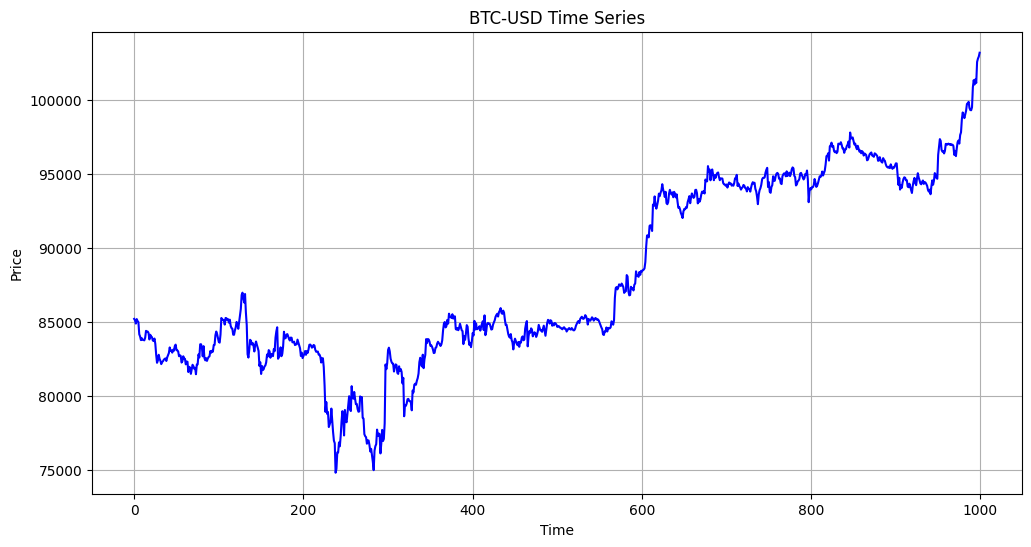

In [71]:
# plot data
plt.figure(figsize=(12, 6))
plt.plot(data[0], label='BTC-USD', color='blue')
plt.title('BTC-USD Time Series')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid()
plt.show()

In [72]:
data = generate_crypto_time_series('../data/eth_data.csv', n_points=1000)

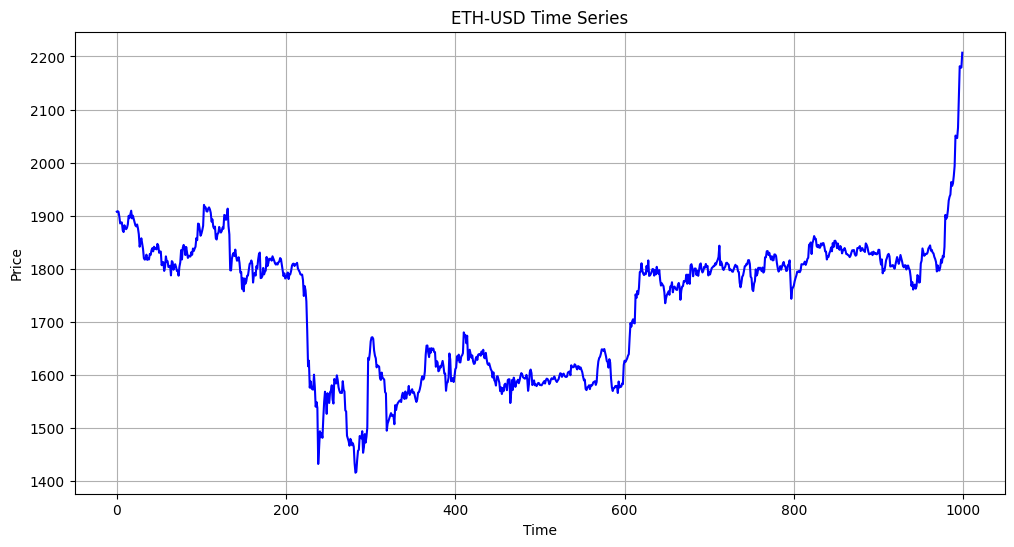

In [73]:
# plot data
plt.figure(figsize=(12, 6))
plt.plot(data[0], label='ETH-USD', color='blue')
plt.title('ETH-USD Time Series')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid()
plt.show()

In [10]:
from river.datasets import WaterFlow

In [27]:
stream = WaterFlow()
data = list(stream.take(10_000))
data = [item[1] for item in data]

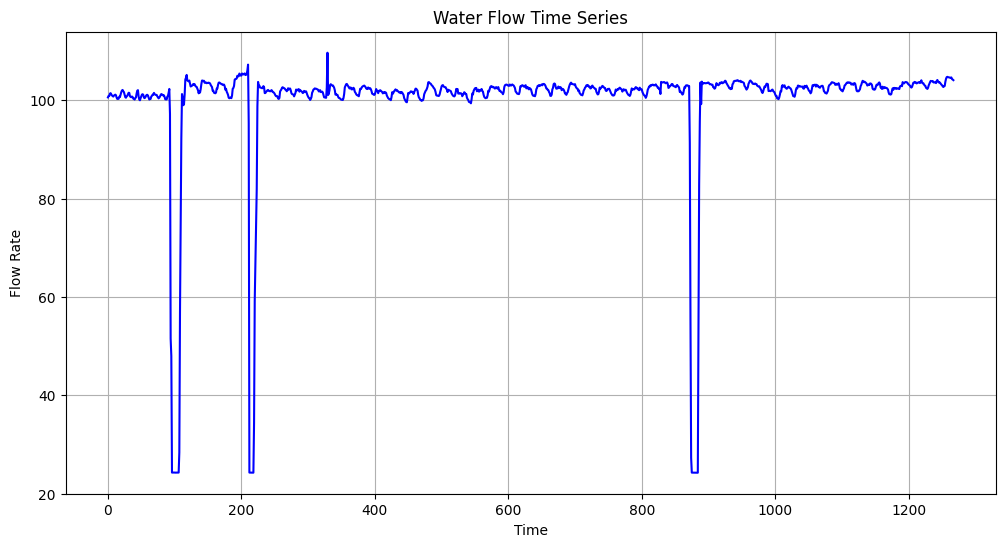

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(data, label='Water Flow', color='blue')
plt.title('Water Flow Time Series')
plt.xlabel('Time')
plt.ylabel('Flow Rate')
plt.grid()
plt.show()